In [22]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code"></form>''')

# RPS-SIS : Dynamical system

In [23]:
%matplotlib inline
from ipywidgets import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider, Button, RadioButtons
import numpy as np
import sympy as sympy
from sympy import *
#from sympy.solvers.solveset import nonlinsolve
import sys, traceback
import operator

init_printing() 

## 1. RPS-SIS dynamical equations for an uncorrelated, k-regular network 

$F(x,y) = \begin{cases} \dot{x}=-x(\delta_{RS} + \lambda ky) + y\delta_{PR} +  x (1-x-y)\nu k\\ 
\dot{y}= -y\left[\delta_{PR} + k(1-x-y)\right] + \lambda k xy + \delta_{SP}(1-x-y)
\end{cases}$

Where x and y correspond to 2 $\rho$'s out of the 3 $\rho$'s in our system. (x,y)=($\rho_{kR}$,  $\rho_{kP}$)

### 1.1 Fixed points when there is only one $\delta$ and one transition rate ($\nu$) at play (Like in the simus)

In [24]:
#MY SYSTEM OF EQUATIONS
x,y,k,mu,nu,lamb,deltaSP,deltaRS,deltaPR=symbols('x,y,k,mu,nu,lamb,deltaSP,deltaRS,deltaPR', positive='True')

eqn1=-x*(deltaRS +(lamb*k*y))+(y*deltaPR)+x*(1-x-y)*nu*k
eqn2=-y*(deltaPR+k*(1-x-y))+(lamb*k*x*y)+deltaSP*(1-x-y)

eqn1_eval=eqn1.subs([(mu,1), (lamb,1), (deltaRS,0), (deltaSP,0)])
eqn2_eval=eqn2.subs([(mu,1), (lamb,1), (deltaRS,0), (deltaSP,0)])
system=[eqn1_eval,eqn2_eval]
#system

When we set the parameters $\lambda=1, \mu=1, \delta_{SP}=0, \delta_{PR}=0$ like in the simulations, and take $\nu , \delta_{PR}$ as variables, has the system of non-linear ODES any solution? Can we find the fixed points (stationary states) of the system? <br>

Yes, we can solve the system analytically if we fix enough parameters, that's why here we solve the equations for the parameter choices of the simulations. Since $\rho_{kS}=1-\rho_{kR}-\rho_{kP}$ the densities of each species (Rocks, Papers, Scissors) at the fixed points will be:

In [25]:
if (is_zero_dimensional(system))==False:
    #print "Yes, these are the fixed points (x,y)=(rho_1,rho_2):"
     print ' '#We just check first that a solution for the system of equations exists
fixed_points= nonlinsolve(system, [x, y])
#fixed_points

$$(0,0,1), \quad (1,0,0), \quad \left( \frac{\delta_{PR}}{k}, \quad  \frac{-\delta_{PR}}{k}+1 , \quad 0\right), \quad \left( \frac{\delta_{PR}+k}{k(\nu+2)}, \quad \frac{\nu(\delta_{PR}+k)}{k(\nu+2)}, \quad 1-\frac{(\delta_{PR}+k)(\nu +1)}{k(\nu+2)}\right)$$

__Find fixed points graphically__: Warning! The images below are in the old notation<br>

We can also find the fixed points graphically, as the intersections of the nullclines $\dot{x}=0$ and $\dot{y}=0$. This procedure gives us more insight. For example, it allows us to quicklyt understand why we do not find an extra fixed point (1,0) analogous to the 2 first ones. If we look at the plot below, we see that in fact, the 3rd fixed point ($1-\frac{\delta_{\mathrm{SP}}}{k}$,0) consists of a line of fixed points that covers the $x$ axis up to $x=1$, thus the point (1,0) is just the very end of this line of fixed points.


<img src="Figures/Fixed_points_1.jpg" alt="Drawing" style="width: 500px;"/>
<img src="Figures/Fixed_points_2.jpg" alt="Drawing" style="width: 500px;"/>


__Check point: Simple RPS__<br>

Notice, we can further specify the parameters of the system (eg. set all $\delta$'s to 0) and for instance calculate the Pure* Rock-Paper-Scissors fixed points. $*$(Pure means without any $\delta$ and taking all transition rates equally strong, $\Rightarrow \nu=1, \  \delta_{PR}=0$, )

For instance for the _Pure RPS_ we have the following fixed points:

In [26]:
eqn1_eval=eqn1.subs([(mu,1), (lamb,1), (deltaRS,0), (nu,1), (deltaPR,0), (deltaSP,0)])#(deltaPR,0) (nu,1)
eqn2_eval=eqn2.subs([(mu,1), (lamb,1), (deltaRS,0), (nu,1), (deltaPR,0), (deltaSP,0)])#, (deltaPR,0) (nu,1)
system=[eqn1_eval,eqn2_eval]
#system

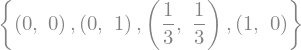

In [27]:
fixed_points_RPS= nonlinsolve(system, [x, y])
fixed_points_RPS
#fixed_points.args[0][0] #Eg. to get the first component of first fixed point.

If we plot the phase portrait (a.k.a. vector field) for the Pure RPS ($\delta_{\mathrm{PR}}=0, \nu=1$), we observe:

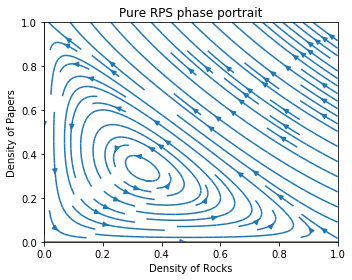

In [28]:
w = 1.0
Y, X = np.mgrid[0:w:100j, 0:w:100j]
U = -10*X**2 -20*X*Y +10*X #This is the dx/dt equation we get after fixing (delta,lambda)=(0,1)= Pure RPS choice
V = +10*Y**2 +20*X*Y -10*Y #This is the dy/dt equation we get after fixing (delta,lambda)=(0,1)= Pure RPS choice

fig = plt.figure(figsize=(5, 4))
gs = gridspec.GridSpec(nrows=1, ncols=1)

xmin, ymin = 0.0, 0.0
xmax, ymax =1.0, 1.0
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[1., 1.])
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([ymin,ymax]) 
ax0.set_xlabel('Density of Rocks')
ax0.set_ylabel('Density of Papers')
ax0.set_title('Pure RPS phase portrait')
plt.tight_layout()
plt.show()

Before proceeding to analyse the stability of all the fixed points we have found, for the sake of ilustration we observe first some phase portraits we obtain while varying the parameters ($\delta_{\mathrm{PR}}, \nu $). These, inform us about the geometry (kind) of the fixed points and the bifurcations (changes in stability) we can expect.
__Unfortunately... The interactive sliders do not work in the jupyter notebook__ So please run the python script "Slider_bars_Matplotlib.py" separately and play with the sliders to observe how the trajectories change. <br>
What you see below is a static snapshot of the interactive plot for ($\delta_{\mathrm{PR}}=0, \nu=0 $)

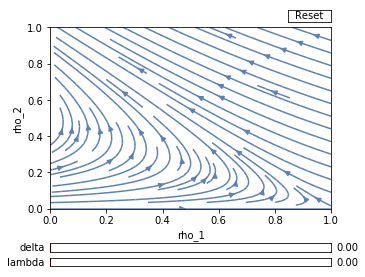

In [29]:
#----Mathematica colors ----
m_blue='#5E81B5'
m_green='#8FB131'
m_mustard='#E19C24'
m_tile='#EC6235'
l_grey='#CCCCC6'
# --------------------------


def system_equations(delta, lamb):
    k=10 #Degree of k-regular network
    U = -k*X**2 -2*k*X*Y +X*(-delta+k) # dx/dt
    V = +k*lamb*Y**2 -k*lamb*Y +k*X*Y*(lamb+1) # dy/dt
    return U,V

fig = plt.figure()
ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.25)

#Parameters to draw initial plot
w = 1.0
Y, X = np.mgrid[0:w:100j, 0:w:100j]
delta_0=0
lamb_0=0

# Draw the initial plot
stream = ax.streamplot(X, Y, system_equations(delta_0,lamb_0)[0],system_equations(delta_0,lamb_0)[1], color=m_blue, density=[1., 1.])
ax.set_xlabel('rho_1')
ax.set_ylabel('rho_2')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Define an axes area and draw a slider in it
delta_slider_ax  = fig.add_axes([0.25, 0.1, 0.65, 0.03])
delta_slider = Slider(delta_slider_ax, 'delta', 0., 10.0, valinit=delta_0)

# Draw another slider
lamb_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03])#
lamb_slider = Slider(lamb_slider_ax, 'lambda', 0., 10.0, valinit=lamb_0)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.9, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color='white', hovercolor=l_grey)
def reset_button_on_clicked(mouse_event):
    delta_slider.reset()
    lamb_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Define an action for modifying the streamplot (actually redrawing) when any slider's value changes
def sliders_on_changed(val):#val es el valor de l'slider (el de delta es= delta_slider.val, el de lambda es lamb_slider.val
    #system_equations(delta_slider.val,lamb_slider.val) #Em retorna U,V evaluats als valors dels sliders
    global stream
    stream.lines.remove()
    ax.patches = []
    stream= ax.streamplot(X, Y, system_equations(delta_slider.val,lamb_slider.val)[0],system_equations(delta_slider.val,lamb_slider.val)[1], color=m_blue, density=[1., 1.])
    ax.set_xlabel('rho_1')
    ax.set_ylabel('rho_2')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])    
    return

#AQUI DINS HAS DE CRIDAR LA FUNCIO Q VULGUIS Q S'IMPLEMENTI (=redraw streamplot) QUAN VARIES UN SLIDER
delta_slider.on_changed(sliders_on_changed)
lamb_slider.on_changed(sliders_on_changed)

plt.show()

### 1.2 Stability of the RPS fixed points corresponding to simulation parameters choices in k-regular net:

The simulation parametes setting we usually investigate corresponds to: $\lambda=1, \delta_{RS}=0, \delta_{SP}=0$<br>
With variable ($\nu$, $\delta_{PR}$)$\geqslant 0$. Average degree of the k-regular network is 10.

In order to find out the stability of the following fixed points $(x_0,y_0)=(0,0,1), \quad (1,0,0), \quad \left( \frac{\delta_{PR}}{k}, \quad  \frac{-\delta_{PR}}{k}+1 , \quad 0\right), \quad \left( \frac{\delta_{PR}+k}{k(\nu+2)}, \quad \frac{\nu(\delta_{PR}+k)}{k(\nu+2)}, \quad 1-\frac{(\delta_{PR}+k)(\nu +1)}{k(\nu+2)}\right)$ <br> 
we need to:

1. Calculate the Jacobian $J[F(x,y)]$<br>
2. Evaluate the Jacobian at each of the fixed points $(x_0,y_0)$<br>
3. For each fixed point, find the eigenvalues by calculating the characteristic polynomial $|J[F(x_0,y_0)]-\lambda I|=0$.<br>
5. Apply stability criteria for continuous-time nonlinear systems following Strogatz classification:<br>

<img src="Figures/Fixed_points_Nonlinear_stability.png" alt="Drawing" style="width: 400px;"/>



Furthermore, we treat our non-linear system as linearized (approximate the phase portrait near a fixed point by that of a corresponding linear system). Therefore, we can use the Fixed points (geometric) classification for __linear__ systems:
<img src="Figures/Fixed_points_Linear.png" alt="Drawing" style="width: 500px;"/>

_(__Notice!__ From now on, I've named the eigenvalues with $\lambda$' to not to confuse them with our variable parameter $\lambda$)._<br>

The __Jacobian__ without being evaluated at any point looks like this:

In [30]:
eqn1=-x*(deltaRS +(lamb*k*y))+(y*deltaPR)+x*(1-x-y)*nu*k
eqn2=-y*(deltaPR+k*(1-x-y))+(lamb*k*x*y)+deltaSP*(1-x-y)
system=np.all([eqn1,eqn2])

X = Matrix(system)
Y = Matrix([x, y])#This matrix contains the variables for which to differenciate matrix X

#1. Calculate Jacobian
Jacob=X.jacobian(Y)
#Jacob

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 35))



TypeError: 
Data type not understood; expecting list of lists or lists of values.

\begin{equation}
J = 
\left(\begin{array}{cc}
-(\delta_{RS}+ \lambda ky)+ \nu k(1-2x-y) & -\lambda kx +\delta_{PR} -\nu kx \\ 
yk + \lambda ky -\delta_{SP} & -\left[\delta_{PR}+k(1-x-2y)\right]+ \lambda kx -\delta_{SP} \end{array}\right)
\end{equation}

###  <u>1.2.1 Stability of 1st fixed point:</u> $(x_0,y_0)=(0,0)$ 

The Jacobian evaluated at $(x_0,y_0)=(0,0)$ looks like:

In [ ]:
#2. Evaluate the Jacobian at a fixed point
eqn1=-x*(deltaRS +(lamb*k*y))+(y*deltaPR)+x*(1-x-y)*nu*k
eqn2=-y*(deltaPR+k*(1-x-y))+(lamb*k*x*y)+deltaSP*(1-x-y)
system=[eqn1,eqn2]

eqn1_eval=eqn1.subs([(mu,1), (lamb,1), (deltaRS,0), (deltaSP,0)])
eqn2_eval=eqn2.subs([(mu,1), (lamb,1), (deltaRS,0), (deltaSP,0)])
system=[eqn1_eval,eqn2_eval]

fixed_points= nonlinsolve(system, [x, y])

X = Matrix(system)
Y = Matrix([x, y])#This matrix contains the variables for which to differenciate matrix X

#1. Calculate Jacobian
Jacob=X.jacobian(Y)
#Jacob

In [ ]:
x_0=fixed_points.args[0][0] #Eg. to get the first component of first fixed point.
y_0=fixed_points.args[0][1] #Eg. to get the second component of first fixed point.


Jacob_at_point=Jacob.subs([(x, x_0), (y,y_0)]) #Specify the parameter and for which value it should be changed
#Jacob_at_point

\begin{equation}
\begin{pmatrix} k\nu & \delta_{PR}\\
0 & -\delta_{PR}-k
\end{pmatrix}
\end{equation}

In [ ]:
#3.Find the eigenvalues
eigenvalues=list(Jacob_at_point.eigenvals().keys())
eigenvalues_multiplicity=list(Jacob_at_point.eigenvals().values())
#print 'Eigenvalues:',eigenvalues,'|Multiplicity:',eigenvalues_multiplicity


$\lambda^{'}_1=k\nu$

$\lambda^{'}_2=-\delta_{PR}-k$

-  If $\nu, \delta_{PR} >0 \Rightarrow$ f.p. = Unstable (saddle).
-  If $\delta_{\mathrm{PR}}=0 \Rightarrow$ f.p. = Unstable (saddle).
-  If $\nu=0 \Rightarrow$ f.p. = Higher order non-isolated. (Phase portrait indicates intrincated behaviour)
-  If $\nu, \delta_{\mathrm{PR}}=0 \Rightarrow$ f.p. =Higher order non-isolated. (Phase portrait indicates intrincated behaviour)<br>

__Intrincated behaviour:__
I am not able to say if the f.p. is stable or not but I observed that when $\nu, \delta_{\mathrm{PR}} =0$ the nullcline of $y$ corresponds to the y axis, and therefore intersects i) one of $x$'s nullclines tangentially and ii) one $x$ nullcline at $y=0.5$. These two intersections may give rise to fixed points of different nature. That may explain why as we increase $\delta_{\mathrm{PR}}$ we observe the central part in the y axis moving downside, because the intersection (ii) moves downward too.

<img src="Figures/2nd_Fixed_Point.png" alt="Drawing" style="width: 900px;"/>

In [ ]:
delta = np.arange(0.0, 10.0, 0.01)
equal_modules=(10+delta)/10
xmin=0
ymin=0
xmax=10
ymax=10 
fig, ax = plt.subplots()
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.plot([0, 10], [0, 0], 'k-', lw=4)
ax.set(xlabel=r'$\delta_{PR}$', ylabel=r'$\nu$',
       title='Stability of point (0,0,0)')
ax.annotate('Unstable',
            xy=(.45, .51), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)

ax.annotate('marginal case',
            xy=(0.4, 0.21), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12, rotation=0)

#plt.legend(framealpha=0.5)
#fig.savefig("test.png")
plt.show()

Recall that "marginal cases" require further non-linear analysis to unravel stability.
Therefore, the fixed point $(x_0,y_0)=(0,0)$ in the ($\delta_{SP},\lambda$) area of interest, which lies below the marginal case line, is basically unstable. This means that the stationary state consisting of ending up with just 1 alive $\rho$ (the one not involved with $\delta_{\mathrm{SP}}$) is an Unstable outcome of the system.

###  <u>1.2.2 Stability of 2nd fixed point: $(x_0,y_0)=(1,0)$</u>

The Jacobian evaluated at $(x_0,y_0)=(1,0)$ looks like:

In [ ]:
#2. Evaluate the Jacobian at a fixed point

x_0=fixed_points.args[1][0] #Eg. to get the first component of second fixed point.
y_0=fixed_points.args[1][1] #Eg. to get the second component of second fixed point.

Jacob_at_point=Jacob.subs([(x, x_0), (y,y_0)]) #Specify the parameter and for which value it should be changed
#Jacob_at_point

\begin{equation}
\begin{pmatrix} -k\nu & \delta_{PR}-k\nu -k\\
0 & -\delta_{PR}+k
\end{pmatrix}
\end{equation}

In [ ]:
#3.Find the eigenvalues
eigenvalues=list(Jacob_at_point.eigenvals().keys())
eigenvalues_multiplicity=list(Jacob_at_point.eigenvals().values())
#print 'Eigenvalues:',eigenvalues,'|Multiplicity:',eigenvalues_multiplicity

$\lambda^{'}_1=-k\nu$<br>

$\lambda^{'}_2=-\delta_{PR}+k$

-  If $\nu, \delta_{PR} >0 \Rightarrow \mbox{f.p} = \begin{cases} \mbox{Stable}, & \mbox{if } \delta_{\mathrm{PR}}>k \\ \mbox{Unstable (saddle)}, & \mbox{if } \delta_{\mathrm{PR}}<k \end{cases}$ 
-  If $\delta_{\mathrm{PR}}=0 \Rightarrow$ f.p. = Unstable (saddle).
-  If $\nu=0 \Rightarrow$ f.p. = Higher order non-isolated. (Phase portrait indicates Unstable)
-  If $\nu, \delta_{\mathrm{PR}}=0 \Rightarrow$ f.p. =Higher order non-isolated. (Phase portrait indicates Unstable)<br>

Notice, $\nu$ does not play a role in the stability of this f.p. since $\lambda_1$' will be always negative because $\lambda \geqslant 0$ and $k>0$. I haven't carefully verified the thing below, but my guess is that while we vary $\delta_{\mathrm{PR}}$ this is what's actually going on with the f.p:

<img src="Figures/Fixed_point_explanation.png" alt="Drawing" style="width: 500px;"/>


In [ ]:
delta = np.arange(0.0, 20.0, 0.01)
#equal_modules=abs(10-delta)/10
xmin=0
ymin=0
xmax=20
ymax=10 
fig, ax = plt.subplots()
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.plot([0, 20], [0, 0], 'k-', lw=4)
#ax.plot(delta,equal_modules,label='$||\lambda_1||=||\lambda_2||$')
ax.plot([10, 10], [0., 10], 'k-', lw=4)
ax.set(xlabel=r'$\delta_{PR}$', ylabel=r'$\nu$',
       title='Stability of point (0,0)')
ax.annotate('Stable',
            xy=(.7, .5), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
ax.annotate('Unstable',
            xy=(.25, .5), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
ax.annotate('marginal case',
            xy=(0.54, 0.7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12, rotation=90)
ax.annotate('marginal case',
            xy=(0.45, 0.21), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12, rotation=0)

#plt.legend(framealpha=0.5)
#fig.savefig("test.png")
plt.show()

###  <u>1.2.3 Stability of 3rd fixed point: $(x_0,y_0)=\left( \frac{\delta_{PR}}{k}, \quad  \frac{-\delta_{PR}}{k}+1\right)$</u>

The Jacobian evaluated at $(x_0,y_0)=\left( \frac{\delta_{PR}}{k}, \quad  \frac{-\delta_{PR}}{k}+1\right)$ looks like:

In [ ]:
#2. Evaluate the Jacobian at a fixed point

x_0=fixed_points.args[2][0] #Eg. to get the first component of third fixed point.
y_0=fixed_points.args[2][1] #Eg. to get the second component of third fixed point.

Jacob_at_point=Jacob.subs([(x, x_0), (y,y_0)]) #Specify the parameter and for which value it should be changed
#Jacob_at_point

\begin{equation}
\begin{pmatrix} -\delta_{PR}\nu + \delta_{PR}+k\nu\left( -\frac{\delta_{PR}}{k}+1+\frac{(\delta_{PR}-k)}{k}-k \right) & -\delta_{PR}\nu\\
-2\delta_{PR}+2k & -\delta_{PR}-k\left( -\frac{\delta_{PR}}{k} +1+\frac{(\delta_{PR}-k)}{k}\right) +k
\end{pmatrix}
\end{equation}

In [ ]:
#3.Find the eigenvalues
eigenvalues=list(Jacob_at_point.eigenvals().keys())
eigenvalues_multiplicity=list(Jacob_at_point.eigenvals().values())
print 'Eigenvalues:',eigenvalues,'|Multiplicity:',eigenvalues_multiplicity

$\lambda^{'}_1=(\delta_{\mathrm{PR}}-k)$<br>

$\lambda^{'}_2=(-\delta_{\mathrm{PR}}\nu -\delta_{\mathrm{PR}} +k)$

-  If $\nu, \delta_{PR} >0 \Rightarrow \mbox{f.p} = \begin{cases} \mbox{Stable}, & \mbox{if } \delta_{\mathrm{PR}}<k & \mbox{and}  & \delta_{\mathrm{PR}}>\frac{k}{\nu +1} \\ \mbox{Unstable (saddle)}, & \mbox{if } \delta_{\mathrm{PR}}<k & \mbox{and}  & \delta_{\mathrm{PR}}<\frac{k}{\nu +1}\\ \mbox{Unstable (saddle)}, & \mbox{if } \delta_{\mathrm{PR}}>k & \mbox{and}  & \delta_{\mathrm{SP}}>\frac{k}{\nu +1}\end{cases}$ <br>
-  If $\nu=0 \Rightarrow$ f.p. = Unstable (saddle) for both $\delta_{\mathrm{PR}}<k$ and $\delta_{\mathrm{PR}}>k $
-  If $\delta_{\mathrm{PR}}=0 \Rightarrow$ f.p. = Unstable (saddle) always.

In [ ]:
delta = np.arange(0.00000001, 20.0, 0.01)
equal_modules=(10/delta)-1
xmin=0
ymin=0
xmax=20
ymax=10 
fig, ax = plt.subplots()
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.plot([0, 0], [0, 10], 'k-', lw=6)
ax.plot([10, 10], [0, 10], 'k-', lw=3)
ax.plot([20, 0], [0, 0], 'k-', lw=4)
ax.plot(delta,equal_modules,label=r'$\nu=\frac{k}{\delta_{\mathrm{PR}}}-1$',lw=1.5)
ax.set(xlabel=r'$\delta_{PR}$', ylabel=r'$\nu$',
       title=r'Stability of point $\left( \frac{\delta_{PR}}{k}, \quad  \frac{-\delta_{PR}}{k}+1\right)$')
ax.annotate('Stable',
            xy=(.35, .5), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
ax.annotate('Unstable',
            xy=(0.12, 0.30), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
ax.annotate('Unstable',
            xy=(0.12, 0.7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=10, rotation=90)
ax.annotate('Unstable',
            xy=(0.6, 0.19), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=10, rotation=0)
ax.annotate('marginal case',
            xy=(0.54, 0.7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12, rotation=90)
ax.annotate('Unstable',
            xy=(.7, .5), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)

plt.legend(framealpha=0.5)
#fig.savefig("test.png")
plt.show()

__Notice__ what we have encountered here are the 3 stability conditions of a stable SIS stationary state that we had already obtained via the generalized (not fixing $\delta_{\mathrm{RS}},\delta_{\mathrm{SP}}$ neither $\lambda$) theoretical calculations. In the theoretical calculations we had that the conditions for a stable SIS stationary state were:<br>

1)  $\delta_{\mathrm{RS}}=0$<br>
2)  $\delta_{\mathrm{PR}}<\lambda k$<br>
3)  $\delta_{\mathrm{SP}}> k - \frac{\delta_{\mathrm{PR}}}{\lambda}(1+\nu)$<br>

Here we recovered 2) and 3) since 1) was imposed from the beginning. Recall in order to be able to solve the system of non-linear equations for 3 alive $\rho$'s and find the fixed points, we also fixed from the beginning $\lambda=1$ and $\delta_{SP}=0$.

###  <u>1.2.4 Stability of 4th fixed point: $\left( \frac{\delta_{PR}+k}{k(\nu+2)}, \quad \frac{\nu(\delta_{PR}+k)}{k(\nu+2)}\right)$</u>

The Jacobian evaluated at $(x_0,y_0)=\left( \frac{\delta_{PR}+k}{k(\nu+2)}, \quad \frac{\nu(\delta_{PR}+k)}{k(\nu+2)}\right)$ looks like:

In [ ]:
#2. Evaluate the Jacobian at a fixed point

x_0=fixed_points.args[3][0] #Eg. to get the first component of third fixed point.
y_0=fixed_points.args[3][1] #Eg. to get the second component of third fixed point.

Jacob_at_point=Jacob.subs([(x, x_0), (y,y_0)]) #Specify the parameter and for which value it should be changed
#Jacob_at_point

\begin{equation}
\begin{pmatrix} \nu\left(k-\frac{(\delta_{PR}+k)(\nu+3)}{(\nu+2)}\right) & \delta_{PR}-\frac{(\delta_{PR}+k)(\nu+1)}{(\nu+2)}\\ \frac{2\nu(\delta_{PR}+k)}{(\nu+2)} & \frac{2(\delta_{PR}+k)(\nu+1)}{(\nu+2)} -\delta_{PR} -k \end{pmatrix}
\end{equation}

In [ ]:
#3.Find the eigenvalues
eigenvalues=list(Jacob_at_point.eigenvals().keys())
eigenvalues_multiplicity=list(Jacob_at_point.eigenvals().values())
#print 'Eigenvalues:',eigenvalues,'|Multiplicity:',eigenvalues_multiplicity

$\lambda^{'}_1=-\frac{\delta_{\mathrm{PR}}\nu}{2}-\frac{\sqrt{\nu}}{2\sqrt{\nu +2}}\sqrt{\delta_{\mathrm{PR}}^2\nu^2 +6\nu\delta_{\mathrm{PR}}^2 +4\delta_{\mathrm{PR}}^2 +4k\nu\delta_{\mathrm{PR}}-4k^2}$<br>

$\lambda^{'}_2=-\frac{\delta_{\mathrm{PR}}\nu}{2}+\frac{\sqrt{\nu}}{2\sqrt{\nu +2}}\sqrt{\delta_{\mathrm{PR}}^2\nu^2 +6\nu\delta_{\mathrm{PR}}^2 +4\delta_{\mathrm{PR}}^2 +4k\nu\delta_{\mathrm{PR}}-4k^2}$

We notice that it's easier to analyse stability by checking the signs of $\tau = \lambda_1^{'}+\lambda_2^{'}$ and $\Delta =\lambda_1^{'}\lambda_2^{'}$ and looking at the diagram from Strogatz in the beginning of this section.<br>

First, $\tau = -\delta_{\mathrm{PR}}\nu \leq 0$  ALWAYS

Since $\lambda_1^{'}=-a-b$ and $\lambda_2^{'}=-a+b$, it happens that $\Delta= a^2 -b^2$: <br>

$\Delta=\left( \frac{\delta_{\mathrm{PR}}\nu}{2}\right)^2- \left( \frac{1}{2}\sqrt{\frac{\nu}{\nu+2}} \sqrt{(\delta_{\mathrm{PR}})^2 6\nu\delta_{\mathrm{PR}}^2 +4\delta_{\mathrm{PR}}^2 +4k\nu\delta_{\mathrm{PR}} -4k^2 } \right)^2$=<br>

$= ... $ (putting things nicer)$...=$ <br>

$= - \frac{1}{\nu +2}\left[ (\nu \delta_{\mathrm{PR}})^2 + \nu\delta_{\mathrm{PR}}^2 + \nu^2k\delta_{\mathrm{PR}} -k^2 \right]$<br>

Therefore, whenever it is satisfied that $k^2 > (\nu \delta_{\mathrm{PR}})^2 + \nu\delta_{\mathrm{PR}}^2 + \nu^2k\delta_{\mathrm{PR}} \Rightarrow \Delta >0$  and we will be in the stable region of the diagram. This means __the condition for stability of the 4th fixed point__ is: <br>

$-\nu^2 (\delta_{\mathrm{PR}}^2 +k\delta_{\mathrm{PR}}) - \nu\delta_{\mathrm{PR}}^2 +k^2 >0$<br>

Which we plot below. The blue area is the one that satisfies this condition, therefore where the 4th fixed point consisting of 3 $\rho$'s alive, is an stationary stable state of the system.

In [ ]:
x, y = symbols('x y')


In [ ]:
k=10
fig, ax = plt.subplots()
#fig = plt.figure()
x = np.linspace(0, 20, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
#plt.ylabel(r'$\nu$')
plt.annotate('Stable',
            xy=(0.14, 0.20), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
plt.annotate('Unstable',
            xy=(0.45, 0.45), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
plt.annotate('marginal case',
            xy=(0.43,0.24), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12, rotation=355.5)
a = -(Y**2)*((X**2)+k*X) - Y*(X**2) +k**2 
#This is the function that separates the the stable and unstable regions
c = plt.contour(x, y, a, [0])
#delta = np.arange(0.00000001, 20.0, 0.01)
#SIS_boundary=(10/delta)-1
#plt.plot(delta,SIS_boundary,lw=1.5)
ax.set(xlabel=r'$\delta_{PR}$', ylabel=r'$\nu$',
       title=r'Stability of point $(x_0,y_0)=\left( \frac{\delta_{PR}+k}{k(\nu+2)}, \quad \frac{\nu(\delta_{PR}+k)}{k(\nu+2)}\right)$')
#plt.title(r'Stability of point $(x_0,y_0)=\left( \frac{\delta_{PR}+k}{k(\nu+2)}, \quad \frac{\nu(\delta_{PR}+k)}{k(\nu+2)}\right)$')
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.show()



###  <u>1.2.5 Stability diagram of the system</u>

<img src="Figures/Stability_diagram_colors.png" alt="Drawing" style="width: 550px;"/>

The above is the stability diagram predicted by the 'linear stability analysis' obtained by combining all previous information about each fixed point.</br>

Things we think we understand:</br>

-  The area were both, RPS and SIS, are stable stationary states. This only means that linearly the two fixed points are stable. However, due to the way in which this system is designed, once one of the species (Scissors) dies it can't return to live. Therefore, SIS is a stronger stable stationary state that in practice doesn't enable RPS stationary stable state to apply. This is the reason why the computational results (eg. orange line below) show that the constructed empirical line for the transition between RPS and SIS stationary states, doesn't pass through the 'Both' area but follows the SIS curve.

In [ ]:
#Empiricla data-points for N=1000, ("power-law" criteria)
x_emp=(0.50, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00)
y_emp=(9.00, 5.60, 2.60, 1.54, 0.98, 0.56, 0.37, 0.20, 0.01)


k=10 
#fig = plt.figure(figsize=(5, 5))
fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5),sharex=True)

x = np.linspace(0, 20, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
#ax1.annotate('Stable RPS',
#            xy=(0.10, 0.20), xycoords='figure fraction',
#            horizontalalignment='left', verticalalignment='top',
#            fontsize=12)
#ax1.annotate('Unstable',
#            xy=(0.45, 0.45), xycoords='figure fraction',
#            horizontalalignment='left', verticalalignment='top',
#            fontsize=12)
#ax1.annotate('marginal case',
#            xy=(0.43,0.18), xycoords='figure fraction',
#            horizontalalignment='left', verticalalignment='top',
#            fontsize=12, rotation=355.5)

a = -(Y**2)*((X**2)+k*X) - Y*(X**2) +k**2 #This is the function that separates the  stable and unstable regions
c = ax1.contour(x, y, a, [0])
delta = np.arange(0.00000001, 20.0, 0.01)

SIS_boundary=(10/delta)-1
y1=5
ax1.plot(delta,SIS_boundary,lw=1.5)
ax1.plot(x_emp,y_emp, '-o',label=r'Empirical $N=10^3$')
ax1.legend()
ax1.set_title(r'Stability diagram')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 10)
plt.show()

The picture above shows in organge some empirical points obtained from the simulations.These points were obtained trying to satisfy the criteria that says that: the $\nu$ value that gives a "power-law" decay of the Scissors prevalence indicates there is a transition to a stable SIS.

Below we show: for each $\delta_{PR}$ chosen for plotting the empirical orange line, all $\nu$ values tested and the 'Scissors' prevalences obtained. This aims to show the typical behaviour of Scissors prevalence nearby the transition between stationary state= RPS to SIS more than to provide proof of which $\nu$ value gives for each $\delta_{PR}$ the power-law behaviour. Clearly, since these results were obtained for simulations of $N=1000$, the network is too small to display any real power-law behaviour.

<img src="Figures/Prevalences_Scissors_N=1000_several_deltas.png" alt="Drawing" style="width: 970px;"/>
